# Moving Beyond Linearity

* Linear models are relatively simple to describe; easy to implement; interpretatable; easy inference. However, standard linear regression can have significant limitations in terms of predictive power because the linearity assumption is almost always an approximation, and sometimes a poor one.
* *Polynomial regression* extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a *power* (example, *cubic regression* with *X*,*X²*,*X³*) - This approach provides a simple way to provide a nonlinear fit to data.
* *Step functions* cut the range of a variable into *K* distinct regions in order to produce a qualitative variable. This has the effect of fitting a piecewise constant function.
* *Regression splines* can be seen as extension of *Polynomial regression* and *Step functions* (but more flexible) involve dividing the range of *X* into *K* distinct regions. Within each region, a polynomial function is fit to the data - polynomial functions are constrained so that they join smoothly at region boundaries or ***knots*** (***P.S.***: The interval is divided into enough regions, this can produce an extremely flexible fit).
* *Smoothing splines* similar to *Regression splines*, result from minimizing a residual sum of squares criterion subject to a smoothness penalty.
* *Local regression* similar to splines, but regions are allowed to overlap, and indeed they do so in a very smooth way.
* *Generalized additive models* (GAMs) allow us to extend the methods above to deal with multiple predictors.

## Polynomial Regression
* Extension of linear regression - the relationship between the predictors and the response is nonlinear, expressed as : $y_{i}= \beta_{0}+\beta_{1}x_{i}+\beta_{2}{x_{i}}^2+\beta_{3}{x_{i}}^3+\ldots+\beta_{d}{x_{i}}^d+\epsilon_{i}$ where 𝞊ᵢ is the error term.
* For large enough degree *d*, a polynomial regression allows us to produce an extremely non-linear curve.
* The coefficients (β-terms) can be easily estimated using least squares linear regression because this is just a standard linear model with predictors (*xᵢ*,*xᵢ²*,*xᵢ³*,...,*xᵢⁿ*).
* When *d* is above 3 or 4, the polynomial curve can become overly flexible and can take on some very strange shapes - especially true near the boundary of the *X* variable.
* Least squares returns variance estimates for each of the fitted coefficients (^βⱼ) as well as the covariances between pairs of coefficient estimates: $\hat{f}(x_{i})=\hat{\beta_{0}}+\hat{\beta_{1}}x_{i}+\hat{\beta_{2}}{x_{i}}^2+\hat{\beta_{3}}{x_{i}}^3+\ldots+\hat{\beta_{d}}{x_{i}}^d+$
* The estimated pointwise standard error of$\hat{f}(x_{i})$ is the square-root of this variance.
* This computation is repeated at each reference point $x_{i}$, and we plot the fitted curve, as well as twice the standard error on either side of the fitted curve - twice the standard error because, for normally distributed error terms, this quantity corresponds to an approximate 95 % confidence interval.
* Logistic regression can also be used if we see some groups - *posterior probability* is given by $P(y_{i}>Amnt|x_{i})=\frac{exp(\beta_{0}+\beta_{1}x_{i}+\beta_{2}{x_{i}}^2+\beta_{3}{x_{i}}^3+\ldots+\beta_{d}{x_{i}}^d)}{1+exp(\beta_{0}+\beta_{1}x_{i}+\beta_{2}{x_{i}}^2+\beta_{3}{x_{i}}^3+\ldots+\beta_{d}{x_{i}}^d)}$

## Step Functions
* Polynomial function of the features as predictors in a linear model imposes a *global* structure on the non-linear function of *X*.
* We break the range of X into *bins*, and fit a different constant in each bin, amounting to converting a *continuous variable* into an *ordered categorical variable*.
* We create *cut-points* $c_{1},c_{2},\ldots,c_{K}$ in the range of *X* an then construct *K + 1* new variables.
$$\begin{align}
C_0(X) &= I(X < c_1) \\
C_1(X) &= I(c_1 \leq X < c_2) \\
C_2(X) &= I(c_2 \leq X < c_3) \\
\vdots \\
C_{K-1}(X) &= I(c_{K-1} \leq X < c_K) \\
C_K(X) &= I(c_K \leq X < X)
\end{align}$$
* *I(·)* is an *indicator function* that returns a `1` if the condition is `True` and returns a `0` otherwise - sometimes called *dummy variables*.
* For any value of *X*, $C_0(X)+C_1(X)+\ldots+C_K(X)=1$ since X must be in exactly one of the *K +1* intervals.
* We then use least squares to fit a linear model using $C_0(X)+C_1(X)+\ldots+C_K(X)=1$ as predictors, $y_{i}=\beta_{0}+\beta_{1}C_1(x_{i})+\beta_{2}C_2(x_{i})+\beta_{3}C_3(x_{i})+\ldots+\beta_{K}C_K(x_{i})+\epsilon_{i}$. For a given value of *X*, at most one of the $C_1,C_2,\ldots,C_K$ can be non-zero.
* When $X<c_1$, all of the predictors in the above point becomes *zero*, so $\beta_0$ can be interpreted as the mean value of *Y* for $X<c_1$.
* Similarly prediction for $c_j \leq X < c_{j+1}$ is given as $\beta_0+\beta_j$ - thus $\beta_j$ represents the average increase in the response for X in $c_j \leq X < c_{j+1}$ relative to $X<c_1$.
* Logistic Regression (like in above *Polynomial Regression*), *posterior probability* is given by $P(y_{i}>Amnt|x_{i})=\frac{exp(\beta_{0}+\beta_{1}C_1(x_{i})+\beta_{2}C_2(x_{i})+\ldots+\beta_{K}C_K(x_{i}))}{1+exp(\beta_{0}+\beta_{1}C_1(x_{i})+\beta_{2}C_2(x_{i})+\ldots+\beta_{K}C_K(x_{i}))}$.
* Unfortunately, unless there are natural breakpoints in the predictors, *piecewise-constant functions* can miss the action.
* *Step function* approaches are very popular in biostatistics and epidemiology, among other disciplines.

## Basis Functions
* *Polynomials* and *piecewise-constant* regression models are in fact special cases of a *basis function* approach.
* The idea is to have at hand a family of functions or transformations that can be applied to a variable X.
* Let the *basis functions* be fixed and known, we choose the functions ahead of time: $b_{1}(X),b_{2}(X),\ldots,b_{K}(X)$ - instead of fitting a linear model in X, we fit the model with the basis functions:$y_{i}=\beta_{0}+\beta_{1}b_1(x_{i})+\beta_{2}b_2(x_{i})+\beta_{3}b_3(x_{i})+\ldots+\beta_{K}b_K(x_{i})+\epsilon_{i}$.
* For polynomials, basis functions are: $b_j(x_j)=x_{i}^{j}$ and for piecewise constant functions : $b_j(x_j)=I(c_j \leq x_i < c_{j+1})$.
* We will then use least squares to estimate the unknown regression coefficients.
* All of the inference tools for linear models such as standard errors for the coefficient estimates and F statistics for the model’s overall significance, are available in this setting.
* It is also possible that we can use *wavelets* or *Fourier series* to construct basis functions.

## Regression Splines
### Piecewise Polynomials
* It involves fitting separate low-degree polynomials over different regions of *X*, where the coefficients differ in different parts of the range of *X*, and these points where the coefficients change are called *knots*.
* For example, a cubic (polynomial) regression without knots can be represented as $y_{i}= \beta_{0}+\beta_{1}x_{i}+\beta_{2}{x_{i}}^2+\beta_{3}{x_{i}}^3+\epsilon_{i}$ while a piecewise cubic polynomial with a single knot at a point *c* takes the form:
  $$ y_{i}= \begin{cases}
  \beta_{01}+\beta_{11}x_{i}+\beta_{21}x_{i}^2+\beta_{31}x_{i}^3+\epsilon_{i} & \text{if } x_{i}<c \\
  \beta_{02}+\beta_{12}x_{i}+\beta_{22}x_{i}^2+\beta_{32}x_{i}^3+\epsilon_{i} & \text{if } x_{i} \geq c
  \end{cases}$$
* We fit two different polynomial functions to the data, on the subset of the observations (here the subset zones of  $x_{i}<c$ and $x_{i} \geq c$ respectively)
* Each of the coefficients $\beta_{01},\beta_{11},\beta_{21},\beta_{31}$ and $\beta_{02},\beta_{012},\beta_{22},\beta_{32}$ can be fit using least squares applied to simple functions of the original predictor.
* Using more knots leads to a more flexible piecewise polynomial - if we place *K* different knots throughout the range of *X*, then we will end up fitting *K+1* different (cubic) polynomials.
* In our piecewise (cubic) polynomials approach, each polynomial have 4 parameter → 8 *degrees of freedom* (since 2 knots* 4 parameters).
### Constraints and Splines
* If the fitted curve is too flexible, we can fit a piecewise polynomial under the *constraint* that the fitted curve must be *continuous* - we can also add constraints: *first* and *second derivatives* of the piecewise polynomials to be *smooth* (in addition to be *continuos*).
* Each constraint that we impose on the piecewise cubic polynomials effectively frees up one degree of freedom, by reducing the complexity of the resulting piecewise polynomial fit.
* Thus adding constraints:continuity, continuity of the first derivative, and continuity of the second derivative, we had reduce the *dof* (degrees of freedom) from `8` to `5`.
* For a *cubic spline* with *K* knots uses a total of *4 + K* degrees of freedom.
* Cubic splines are popular because most human eyes cannot detect the discontinuity at the knots.
* The general definition of a degree-d spline is that it is a piecewise degree-d polynomial, with continuity in derivatives up to degree d − 1 at each knot i.e., as per our example, cubic polynomial with degree `3`, so (3-1=2) `2` derivatives at each knot!
### The Spline Basis Representation
* A cubic spline with K knots can be modeled as $y_{i}=\beta_{0}+\beta_{1}b_1(x_{i})+\beta_{2}b_2(x_{i})+\beta_{3}b_3(x_{i})+\ldots+\beta_{K+3}b_{K+3} (x_{i})+\epsilon_{i}$.
* The direct way to represent a cubic spline is to start off with a basis for a cubic polynomial($x,x^2,$ and $x^3$) and then add one *truncated power basis function* per knot.
* A general *truncated power basis function* is defined as
$$ h(x,\xi) = (x - \xi)^d_+ = \begin{cases}
(x - \xi)^d, & \text{if } x \ge \xi \\
0, & \text{if } x < \xi
\end{cases}$$, where $\xi$ is is the knot. Replace `k` with `3` for cubical splines!
* By adding a term of the form $\beta_{4}h(x,\xi)$ to a cubical polynomial will lead to a discontinuity in only the third derivative at $\xi$, the function will remain continuous, with continuous first and second derivatives, at each of the knots.
* In order to fit a cubic spline to a data set with K knots, we perform least squares regression with: intercept and  3+K predictors, making a total of 4+K regression coefficients - thus 4+K degrees of freedom!
* Splines can have high variance at the outer range of the predictors i.e., when X takes on either a very small or very large value.
* A *natural spline* is a regression spline with additional boundary constraints: function is required to be linear at the boundary - region where X is smaller than the smallest knot, or larger than the largest knot.
* This makes natural splines generally produce more stable estimates at the boundaries.
### Choosing the Number and Locations of the Knots
* The regression spline is most flexible in regions that contain a lot of knots since polynomial coefficients can change rapidly in those regions.
* So, one option, is to place more knots in places where the function might vary most rapidly and to place fewer knots where it seems more stable.
* In practice it is common to place knots in a uniform fashion - specify the desired degrees of freedom, and then have the software automatically place the corresponding number of knots at uniform quantiles of the data.
* How many knots should we use or how many degrees of freedom should our spline contain?
  1. Try out different numbers of knots and see which produces the best looking curve.
  2. Somewhat objective approach is to use cross-validation -  we remove a portion of the data, say 10%, fit a spline with a certain number of knots to the remaining data and then use the spline to make predictions for the held-out portion - epeat this process until each observation has been left out once compute the overall cross-validated RSS - same procedure repeated for different numbers of knots *K* -  value of K giving the smallest RSS is chosen.
### Comparison to Polynomial Regression
* Regression splines often give superior results to polynomial regression because splines introduce flexibility by increasing the number of knots but keeping the degree fixed.
* Splines also allow us to place more knots (more flexibility), over regions where the function f seems to be changing rapidly and fewer knots where f appears more stable.

## Smoothing Splines
* In fitting a smooth curve to a set of data, we want to find some function, say $g(x)$, such that we need RSS to be small - RSS is given by $RSS = \sum_{i=1}^{n} \left(y_i -g(x_i) \right)^2$ - but if we don’t put any constraints on $g(xi)$, then we can always make $RSS$ zero simply by choosing $g$ such that it interpolates all of the $y_i$ - Such a function would woefully overfit the data and far too flexible!
* How might we ensure that g is smooth? Natural way is to find the function $g$ that minimizes $\sum_{i=1}^{n} \left(y_i -g(x_i) \right)^2 + \lambda \int g''(t)^2 dt$ - where $\lambda$ is a non-negative tuning parameter; and the function that minimizes the said `loss+penalty` components is known as a *smoothing spline*.
* The term $\sum_{i=1}^{n} \left(y_i -g(x_i) \right)^2$ is called *loss function* and the term $\int g''(t)^2 dt$ is called *penalty term* which penalizes the variability in $g$ - $g''(t)$ means *second derivative* which measure the the amount by which the slope is changing - also means, measure of its *roughness* ; while $g'(t)$ means *first derivative* of the function $g$ which measures the slope of a function at $t$.
* If $g$ is smooth, then $g'(t)$ will be close to constant and $\int g''(t)^2 dt $ will take on a small value and if $g$ is jumpy / variable, then $g'(t)$ will vary significantly and $\int g''(t)^2 dt $ will take on a large value and therefore and $\lambda \int g''(t)^2 dt $ encourages $g$ to be smooth.
* Larger the value of $\lambda$, smoother the curve $g$ - when $\lambda =0$, penalty has no effect and hence $g$ is jumpy / variable - As $\lambda \rightarrow \infty$, g will be perfectly smooth.
* The function $g$ has some special properties:
  1. It is a piecewise cubic polynomial with knots at the unique values of $x_1,\ldots,x_n$ continuous first and second derivatives at each knot.
  2. It is linear in the region outside of the extreme knots.
* It is a shrunken version of such a natural cubic spline and the value of the tuning parameter $\lambda$ controls the level of shrinkage.
### Choosing the Smoothing Parameter $\lambda$
* The tuning parameter $\lambda$ controls the roughness of the smoothing spline, and hence the *effective degrees of freedom*.
* As $\lambda$ increases from 0 to $\infty$, the $df_{\lambda}$ will decrease from $n$ to 2.
* The *degrees of freedom* refer to the number of free parameters i.e., number of coefficients fit in a polynomial or cubic spline -  If a smoothing spline has n parameters, hence n nominal degrees of freedom, these n parameters are heavily *constrained* or *shrunk down* - $df_{\lambda}$ is a measure of the flexibility of the smoothing spline - higher it is, the more flexible, the lower-bias but higher-variance.
* So, if we have solution $\hat{g}_{\lambda}$ that minimizes the above `loss+penalty` components, for a particular choice of $\lambda$ (n-vector containing the fitted values of the smoothing spline at the training points $x_1,\ldots,x_n$, then the equation $\hat{g}_{\lambda}= S_{\lambda}y$ indicates that the vector of fitted values when applying a smoothing spline to the data can be written as a $n\times n$ matrix $S_{\lambda}$ imes the response vector $y$, then the *effective degrees of freedom* is defined as $df_{\lambda}=\sum_{i=1}^{n}\{S_{\lambda}\}_{ii}$, the sum of the diagonal elements of the matrix $S_{\lambda}$.
* In fitting a smoothing spline, we do not need to select the number or location of the knots instead we need to choose the value of $\lambda$ by cross-validation.
* The *leave one- out cross-validation* error (LOOCV) can be computed as $RSS_{cv}(\lambda)= \sum_{i=1}^{n} \left(y_i - \hat{g}_{\lambda}^{(-i)}(x_i) \right)^2 = \sum_{i=1}^{n}\left[\frac{y_i - \hat{g}_{\lambda}(x_i)}{1-\{S_{\lambda}\}_{ii}}\right]^2$;<br> where notations $\hat{g}_{\lambda}^{(-i)}(x_i)$ indicates the fitted value for this smoothing spline evaluated at $x_i$,<br>$\hat{g}_{\lambda}(x_i)$ indicates the smoothing spline function fit to all of the training observations and evaluated at $x_i$.
* This remarkable formula says that we can compute each of these leave one-out fits using only $\hat{g}_{\lambda}$, the original fit to all of the data.

## Local Regression
* *Local Regression* is a different approach for fitting flexible non-linear functions, which involves computing the fit at a target point $x_0$ using only the nearby training observations.
* Local regression is sometimes referred to as a memory-based procedure, because like nearest-neighbors, we need all the training data each time we wish to compute a prediction.
* In order to perform local regression:
  - need to define the weighting function K. <br>
  - whether to fit a linear, constant, or quadratic regression in Step 3 of the algorithm.<br>
  - the most important choice is the *span s*,which is the proportion of points used to compute the local regression at $x_0$ defined in Step 1 of the algorithm - span plays a role like that of the tuning parameter $\lambda$ - smaller the value of *s* more local and wiggly will be the fit; large value of s will lead to a global fit to the data using all of the training observations - We can again use cross-validation to choose *s*.
* In a setting with multiple features $X_1,X_2,\ldots,X_n$, by using the idea of local regression, it can be generalized to fitting a multiple linear regression model that is global in some variables, but local in another which is known as *varying coefficient models*.
* Local regression also generalizes when we want to fit models that are local in a pair of variables $X_1 and X_2$ rather than one.
* We can simply use two-dimensional neighborhoods, and fit bivariate linear regression models using the observations that are near each target point in two-dimensional space.
* Same approach can be implemented in higher dimensions, using linear regressions fit to p-dimensional neighborhoods - Local regression can perform poorly if p is much larger than about 3 or 4 because there will generally be very few training observations close to $x_0$
* Nearest-neighbors regression also suffers from a similar problem in high dimensions.
### Algorithm for Local Regression
1. Gather the fraction $s=k/n$ of training points whose $x_i$ are closest to $x_0$.
2. Assign a weight $K_{i0}=K(x_i,x_0)$ to each point in this neighborhood such that the point furthest from $x_0$ has weight zero, and the closest has the highest weight. All but these *k nearest neighbors* get weight zero.
3. Fit a *weighted least squares regression* of $y_i$ on $x_i$ using weights mentioned in point#2 by finding $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize $\sum_{i=1}^{n}K_{i0} \left(y_i - \beta_0 -\beta_1 x_i \right)^2$.
4. The fitted value at $x_0$ is given by $\hat{f}(x_0)=\hat{\beta_0}+\hat{\beta_1}x_0$

## Generalized Additive Models
* *Generalized additive models* (GAMs) provide a general framework for generalized extending a standard linear model by allowing non-linear functions of each of the variables, while maintaining additivity.
* GAMs can be applied with both quantitative and qualitative responses.
### GAMs for a quantitative response (Regression problems)
* A multiple linear regression model, in order to allow for non-linear relationships between each feature and the response is to replace each linear component $\beta_{j}x_{ij}$ with a (smooth) nonlinear function $f_{j}(x_{ij})$ that would re-write the model as $y_i=\beta_0+\sum_{j=1}^{p}f_{j}(x_{ij})+\epsilon_i = \beta_0+f_{1}(x_{i1})+f_{2}(x_{i2})+\ldots+f_{p}(x_{ip})+\epsilon_i$- It is called an *additive* model because we calculate a separate $f_j$ for each $X_j$ and then add together all of their contributions.
* All the above discussed methods (from *Polynomial regression* to *Local Regression*) can be used as building blocks for fitting an additive model.
* Fitting a GAM with a smoothing spline is not quite as simple as fitting a GAM with a natural spline, since in the case of smoothing splines, least squares cannot be used.
* `Python` package `pygam` can be used to fit GAMs using smoothing splines, via an approach known as *backfitting* - This method fits a model involving multiple predic- tors by repeatedly updating the fit for each predictor in turn, holding the others fixed - each time we update a function, we simply apply the fitting method for that variable to a *partial residual*.
* Partial Residual for $X_3$ has the form $r_i=y_i - f_1(x_{i1})- f_2(x_{i2})$ and if we know $f_1$ and $f_2$, then we can fit $f_3$ by treating this residual as a response, in a non-linear regression on $X_3$.
* In most situations, the differences in the GAMs obtained using smoothing splines versus natural splines are small.
* We do not have to use splines as the building blocks for GAMs, use local regression, polynomial regression, or any combination of the approaches, in order to create a GAM.
## Pros of GAMs
&#x2705;GAMs allow us to fit a non-linear $f_i$ to each $X_j$, so that we can automatically model non-linear relationships - we do not need to manually try out many different transformations on each variable individually.<br>
&#x2705;The non-linear fits can potentially make more accurate predictions for the response Y.<br>
&#x2705;We can examine the effect of each $X_j$ on Y, individually while holding all of the other variables fixed. <br>
&#x2705;The smoothness of the function $f_j$ for the variable $X_j$ can be summarized via degrees of freedom.<br>
## Cons of GAMs
&#x2717; GAMs are restricted to be additive - With many variables, important interactions can be missed.<br>
&#x2717; We can manually add interaction terms to the GAM model by including additional predictors of the form $X_j \times X_k$. <br>
&#x2717; We can add low-dimensional interaction functions of the form $f_{jk}(X_j,X_k)$ into the model; such terms can be fit using two-dimensional smoothers such as local regression, or two-dimensional splines.
### GAMs for a qualitative response (Classification Problems)
* If we assume, for simplicity, the response variable Y takes 0 and 1 and let `p(X)=P(Y=1|X)`be the conditional probability (given the predictors) that the response equals 1; From our *logistic regression* model, inorder to allow for non-linear relationships is to use the model: $log \left(\frac{p(X)}{1-p(X)}\right)=\beta_0+f_{1}(X_1)+f_{2}(X_2)+\ldots+f_{p}(X_p)$ - this eqn. is a *logistic regression GAM*.
* Same Pros and Cons as above.

# Lab: Non-Linear Modeling

In this lab, we demonstrate some of the nonlinear models discussed in this chapter. We use the `Wage` data as a running example, and show that many of the complex non-linear fitting procedures discussed can easily be implemented in `Python`.

In [28]:
# Standard imports
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize ,
poly ,
ModelSpec as MS)
from statsmodels.stats.anova import anova_lm

In [2]:
# New imports specifically needed for this lab
from pygam import (s as s_gam ,
                   l as l_gam,
                   f as f_gam,
                   LinearGAM ,
                   LogisticGAM)
from ISLP.transforms import (BSpline ,
                             NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam ,
                        degrees_of_freedom ,
                        plot as plot_gam ,
                        anova as anova_gam)

## Polynomial Regression and Step Functions
We start by demonstrating how Polynomial Regression and Step Functions can be reproduced. Let’s begin by loading the data.

In [3]:
Wage = load_data('Wage')
y = Wage['wage']
age = Wage['age']

Throughout most of this lab, our response is `Wage['wage']`, which we have stored as `y` above. As per earlier 3rd chapters we will use the `poly()` function to create a model matrix that will fit a 4th degree polynomial in `age`.

In [4]:
poly_age = MS([poly('age', degree=4)]).fit(Wage)
M = sm.OLS(y, poly_age.transform(Wage)).fit()
summarize(M)

,coef,std err,t,P>|t|
intercept,111.7036,0.729,153.283,0.000
"poly(age, degree=4)[0]",447.0679,39.915,11.201,0.000
"poly(age, degree=4)[1]",-478.3158,39.915,-11.983,0.000
"poly(age, degree=4)[2]",125.5217,39.915,3.145,0.002
"poly(age, degree=4)[3]",-77.9112,39.915,-1.952,0.051


This polynomial is constructed using the function `poly()`, which creates a special transformer `Poly()` (using `sklearn` terminology for feature transformations such as transformer `PCA()` as seen in Chapter 6, which allows for easy evaluation of the polynomial at new data points. Here `poly()` is referred to as a *helper* function, and sets up the transformation; `Poly()` is the ac- tual workhorse that computes the transformation.<br> In the code above, the first line executes the `fit()` method using the dataframe `Wage`. This recomputes and stores as attributes any parameters needed by `Poly()` on the training data, and these will be used on all subsequent evaluations of the `transform()` method. For example, it is used on the second line, as well as in the plotting function developed below. We now create a grid of values for `age` at which we want predictions. 

In [5]:
age_grid = np.linspace(age.min(),
                       age.max(),
                       100)
age_df = pd.DataFrame({'age': age_grid})

Finally, we wish to plot the data and add the fit from the fourth-degree polynomial. As we will make several similar plots below, we first write a function to create all the ingredients and produce the plot. Our function takes in a model specification (here a basis specified by a transform), as well as a grid of `age` values. The function produces a fitted curve as well as 95% confidence bands. By using an argument for `basis` we can produce and plot the results with several different transforms, such as the splines we will see shortly.

In [6]:
def plot_wage_fit(age_df ,basis ,title):
    X = basis.transform(Wage)
    Xnew = basis.transform(age_df)
    M = sm.OLS(y, X).fit()
    preds = M.get_prediction(Xnew)
    bands = preds.conf_int(alpha=0.05)
    fig , ax = subplots(figsize=(8,8))
    ax.scatter(age ,
               y,
               facecolor='gray',
               alpha=0.5
              )
    for val , ls in zip([preds.predicted_mean ,bands[:,0],bands[:,1]],['b','r--','r--']):
        ax.plot(age_df.values , val , ls, linewidth=3)
    ax.set_title(title , fontsize =20)
    ax.set_xlabel('Age', fontsize=20)
    ax.set_ylabel('Wage', fontsize=20);
    return ax

We include an argument `alpha` to `ax.scatter()` to add some transparency to the points. This provides a visual indication of density. Notice the use of the `zip()` function in the for loop above (see Section 2.3.8). We have three lines to plot, each with different colors and line types. Here `zip()` conveniently bundles these together as iterators in the loop (In `Python` speak, an “iterator” is an object with a finite number of values, that can
be iterated on, as in a loop). We now plot the fit of the fourth-degree polynomial using this function

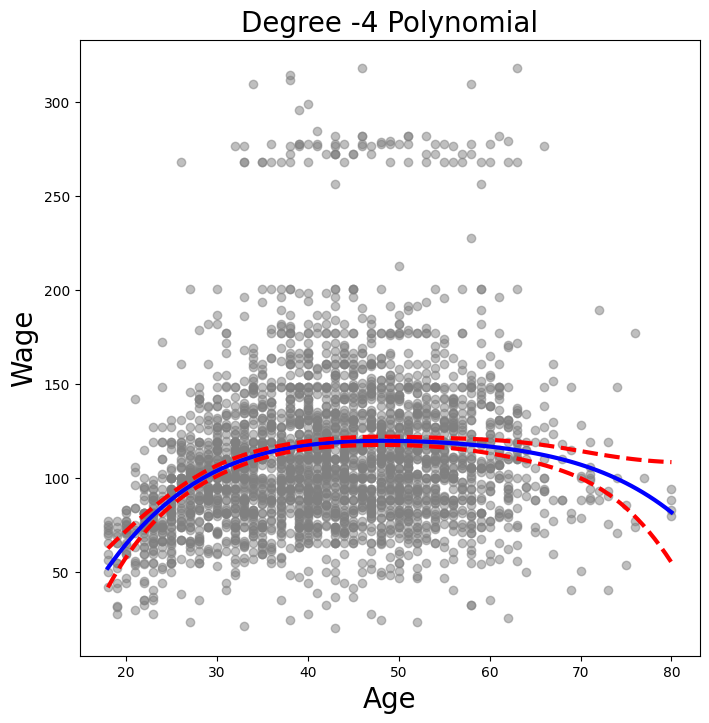

In [7]:
plot_wage_fit(age_df ,
              poly_age ,
              'Degree -4 Polynomial');

With polynomial regression we must decide on the degree of the polynomial to use. Sometimes we just wing it, and decide to use second or third degree polynomials, simply to obtain a nonlinear fit. But we can make such a decision in a more systematic way. One way to do this is through hypothesis tests, which we demonstrate here. We now fit a series of models ranging from linear (degree-one) to degree-five polynomials, and look to determine the simplest model that is sufficient to explain the relationship between `wage` and `age`. We use the `anova_lm()` function, which performs a series of ANOVA tests. An *analysis of variance* or *ANOVA* tests the null hypothesis that a model M1 is sufficient to explain the data against the alternative hypothesis that a more complex model M2 is required. The determination is based on an F-test. To perform the test, the models M1 and M2 must be nested: the space spanned by the predictors in M1 must be a subspace of the space spanned by the predictors in M2. In this case, we fit five different polynomial models and sequentially compare the simpler model to the more complex model.

In [8]:
models = [MS([poly('age', degree=d)]) for d in range(1, 6)]
Xs = [model.fit_transform(Wage) for model in models]
anova_lm(*[sm.OLS(y, X_).fit() for X_ in Xs])

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


Notice the `*` in the `anova_lm()` line above. This function takes a variable number of non-keyword arguments, in this case fitted models. When these models are provided as a list (as is done here), it must be prefixed by `*`. The p-value comparing the linear `models[0]` to the quadratic `models[1]` is essentially zero, indicating that a linear fit is not sufficient (Indexing starting at zero is confusing for the polynomial degree example, since
`models[1]` is quadratic rather than linear!). Similarly the p-value comparing the quadratic `models[1]` to the cubic `models[2]` is very low (0.0017), so the quadratic fit is also insufficient. The p-value comparing the cubic and degree-four polynomials, `models[2]` and `models[3]`, is approximately 5%, while the degree-five polynomial `models[4]` seems unnecessary because its p-value is 0.37. Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified. In this case, instead of using the `anova()` function, we could have obtained these p-values more succinctly by exploiting the fact that `poly()` creates orthogonal polynomials.

In [9]:
summarize(M)

,coef,std err,t,P>|t|
intercept,111.7036,0.729,153.283,0.000
"poly(age, degree=4)[0]",447.0679,39.915,11.201,0.000
"poly(age, degree=4)[1]",-478.3158,39.915,-11.983,0.000
"poly(age, degree=4)[2]",125.5217,39.915,3.145,0.002
"poly(age, degree=4)[3]",-77.9112,39.915,-1.952,0.051


Notice that the p-values are the same, and in fact the square of the t-statistics are equal to the F-statistics from the `anova_lm()` function; for example:

In [10]:
(-11.983)**2

143.59228900000002

However, the ANOVA method works whether or not we used orthogonal polynomials, provided the models are nested. For example, we can use `anova_lm()` to compare the following three models, which all have a linear term in `education` and a polynomial in `age` of different degrees:

In [11]:
models = [MS(['education', poly('age', degree=d)])for d in range(1, 4)]
XEs = [model.fit_transform(Wage)for model in models]
anova_lm(*[sm.OLS(y, X_).fit() for X_ in XEs])

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2997.0,3.902335e+06,0.0,NaN,NaN,NaN
1,2996.0,3.759472e+06,1.0,142862.701185,113.991883,3.838075e-26
2,2995.0,3.753546e+06,1.0,5926.207070,4.728593,2.974318e-02


As an alternative to using hypothesis tests and ANOVA, we could choose the polynomial degree using cross-validation, as discussed in Chapter 5.<br> Next we consider the task of predicting whether an individual earns more
than $250,000 per year. We proceed much as before, except that first we create the appropriate response vector, and then apply the `glm()` function using the binomial family in order to fit a polynomial logistic regression model.

In [12]:
X = poly_age.transform(Wage)
high_earn = Wage['high_earn'] = y > 250 # shorthand
glm = sm.GLM(y > 250,
             X,
             family=sm.families.Binomial())
B = glm.fit()
summarize(B)

,coef,std err,z,P>|z|
intercept,-4.3012,0.345,-12.457,0.000
"poly(age, degree=4)[0]",71.9642,26.133,2.754,0.006
"poly(age, degree=4)[1]",-85.7729,35.929,-2.387,0.017
"poly(age, degree=4)[2]",34.1626,19.697,1.734,0.083
"poly(age, degree=4)[3]",-47.4008,24.105,-1.966,0.049


Once again, we make predictions using the `get_prediction()` method:

In [13]:
newX = poly_age.transform(age_df)
preds = B.get_prediction(newX)
bands = preds.conf_int(alpha=0.05)

We now plot the estimated relationship.

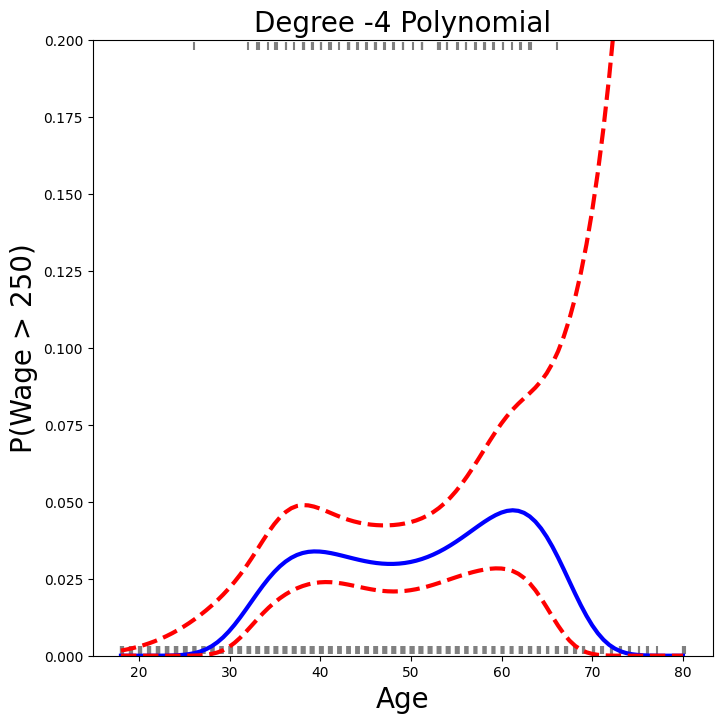

In [14]:
fig , ax = subplots(figsize=(8,8))
rng = np.random.default_rng(0)
ax.scatter(age +0.2 * rng.uniform(size=y.shape[0]),
           np.where(high_earn , 0.198, 0.002),
           fc='gray',
           marker='|')
for val , ls in zip([preds.predicted_mean ,bands[:,0],bands[:,1]],['b','r--','r--']):
    ax.plot(age_df.values , val , ls, linewidth=3)
ax.set_title('Degree -4 Polynomial', fontsize=20)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylim ([0,0.2])
ax.set_ylabel('P(Wage > 250)', fontsize=20);

We have drawn the `age` values corresponding to the observations with `wage` values above 250 as gray marks on the top of the plot, and those with `wage` values below 250 are shown as gray marks on the bottom of the plot. We added a small amount of noise to jitter the `age` values a bit so that observations with the same `age` value do not cover each other up. This type of plot is often called a *rug plot*.<br> In order to fit a step function, as discussed in Section 7.2, we first use the `pd.qcut()` function to discretize `age` based on quantiles. Then we use `pd.get_dummies()` to create the columns of the model matrix for this categorical variable. Note that this function will include *all* columns for a given categorical, rather than the usual approach which drops one of the levels.

In [15]:
cut_age = pd.qcut(age , 4)
summarize(sm.OLS(y, pd.get_dummies(cut_age)).fit())

,coef,std err,t,P>|t|
"(17.999, 33.75]",94.1584,1.478,63.692,0.0
"(33.75, 42.0]",116.6608,1.470,79.385,0.0
"(42.0, 51.0]",119.1887,1.416,84.147,0.0
"(51.0, 80.0]",116.5717,1.559,74.751,0.0


Here `pd.qcut()` automatically picked the cutpoints based on the quantiles 25%, 50% and 75%, which results in four regions. We could also have specified our own quantiles directly instead of the argument 4. For cuts not based on quantiles we would use the `pd.cut()` function. The function `pd.qcut()` (and `pd.cut()`) returns an ordered categorical variable. The regression model then creates a set of dummy variables for use in the regression. Since `age` is the only variable in the model, the value $94,158.40 is the average salary for those under 33.75 years of age, and the other coefficients are the average salary for those in the other age groups. We can produce predictions and plots just as we did in the case of the polynomial fit.

## Splines

In order to fit regression splines, we use transforms from the `ISLP` package. The actual spline evaluation functions are in the `scipy.interpolate package`; we have simply wrapped them as transforms similar to `Poly()` and `PCA()`.<br> In Section 7.4, we saw that regression splines can be fit by constructing an appropriate matrix of basis functions. The `BSpline()` function generates the entire matrix of basis functions for splines with the specified set of knots. By default, the B-splines produced are cubic. To change the degree, use the argument `degree`.

In [16]:
bs_ = BSpline(internal_knots=[25,40,60], intercept=True).fit(age)
bs_age = bs_.transform(age)
bs_age.shape

(3000, 7)

This results in a seven-column matrix, which is what is expected for a cubicspline basis with 3 interior knots. We can form this same matrix using the `bs()` object, which facilitates adding this to a model-matrix builder (as in `poly()` versus its workhorse `Poly()`) described in Section 7.8.1.<br>We now fit a cubic spline model to the `Wage` data.

In [17]:
bs_age = MS([bs('age', internal_knots=[25,40,60])])
Xbs = bs_age.fit_transform(Wage)
M = sm.OLS(y, Xbs).fit()
summarize(M)

,coef,std err,t,P>|t|
intercept,60.4937,9.460,6.394,0.000
"bs(age, internal_knots=[25, 40, 60])[0]",3.9805,12.538,0.317,0.751
"bs(age, internal_knots=[25, 40, 60])[1]",44.6310,9.626,4.636,0.000
"bs(age, internal_knots=[25, 40, 60])[2]",62.8388,10.755,5.843,0.000
"bs(age, internal_knots=[25, 40, 60])[3]",55.9908,10.706,5.230,0.000
"bs(age, internal_knots=[25, 40, 60])[4]",50.6881,14.402,3.520,0.000
"bs(age, internal_knots=[25, 40, 60])[5]",16.6061,19.126,0.868,0.385


The column names are a little cumbersome, and have caused us to truncate the printed summary. They can be set on construction using the `name` argument as follows.

In [18]:
bs_age = MS([bs('age',
                internal_knots=[25,40,60],
                name='bs(age)')]
           )
Xbs = bs_age.fit_transform(Wage)
M = sm.OLS(y, Xbs).fit()
summarize(M)

,coef,std err,t,P>|t|
intercept,60.4937,9.460,6.394,0.000
bs(age)[0],3.9805,12.538,0.317,0.751
bs(age)[1],44.6310,9.626,4.636,0.000
bs(age)[2],62.8388,10.755,5.843,0.000
bs(age)[3],55.9908,10.706,5.230,0.000
bs(age)[4],50.6881,14.402,3.520,0.000
bs(age)[5],16.6061,19.126,0.868,0.385


Notice that there are 6 spline coefficients rather than 7. This is because, by default, `bs()` assumes `intercept=False`, since we typically have an overall intercept in the model. So it generates the spline basis with the given knots, and then discards one of the basis functions to account for the intercept.<br>We could also use the `df` (degrees of freedom) option to specify the complexity of the spline. We see above that with 3 knots, the spline basis has 6 columns or degrees of freedom. When we specify df=6 rather than the actual knots, `bs()` will produce a spline with 3 knots chosen at uniform quantiles of the training data. We can see these chosen knots most easily using `Bspline()` directly:

In [19]:
BSpline(df=6).fit(age).internal_knots_

array([33.75, 42.  , 51.  ])

When asking for six degrees of freedom, the transform chooses knots at ages 33.75, 42.0, and 51.0, which correspond to the 25th, 50th, and 75th percentiles of `age`.<br> When using B-splines we need not limit ourselves to cubic polynomials (i.e. `degree=3`). For instance, using `degree=0` results in piecewise constant functions, as in our example with `pd.qcut()` above.

In [20]:
bs_age0 = MS([bs('age',
                 df=3,
                 degree=0)]).fit(Wage)
Xbs0 = bs_age0.transform(Wage)
summarize(sm.OLS(y, Xbs0).fit())

,coef,std err,t,P>|t|
intercept,94.1584,1.478,63.687,0.0
"bs(age, df=3, degree=0)[0]",22.3490,2.152,10.388,0.0
"bs(age, df=3, degree=0)[1]",24.8076,2.044,12.137,0.0
"bs(age, df=3, degree=0)[2]",22.7814,2.087,10.917,0.0


This fit should be compared with cell `[15]` where we use `qcut()` to create four bins by cutting at the 25%, 50% and 75% quantiles of `age`. Since we specified `df=3` for degree-zero splines here, there will also be knots at the
same three quantiles. Although the coefficients appear different, we see that this is a result of the different coding. For example, the first coefficient is identical in both cases, and is the mean response in the first bin. For the second coefficient, we have 94.158+22.349 = 116.507 $\approx$ 116.611, the latter being the mean in the second bin in cell `[15]`. Here the intercept is coded by a column of ones, so the second, third and fourth coefficients are increments for those bins. Why is the sum not exactly the same? It turns out that the `qcut()` uses $\leq$ while `bs()` uses < when deciding bin membership.<br> In order to fit a natural spline, we use the `NaturalSpline()` transform with the corresponding helper `ns()`. Here we fit a natural spline with five degrees of freedom (excluding the intercept) and plot the results.

In [21]:
ns_age = MS([ns('age', df=5)]).fit(Wage)
M_ns = sm.OLS(y, ns_age.transform(Wage)).fit()
summarize(M_ns)

,coef,std err,t,P>|t|
intercept,60.4752,4.708,12.844,0.000
"ns(age, df=5)[0]",61.5267,4.709,13.065,0.000
"ns(age, df=5)[1]",55.6912,5.717,9.741,0.000
"ns(age, df=5)[2]",46.8184,4.948,9.463,0.000
"ns(age, df=5)[3]",83.2036,11.918,6.982,0.000
"ns(age, df=5)[4]",6.8770,9.484,0.725,0.468


We now plot the natural spline using our plotting function.

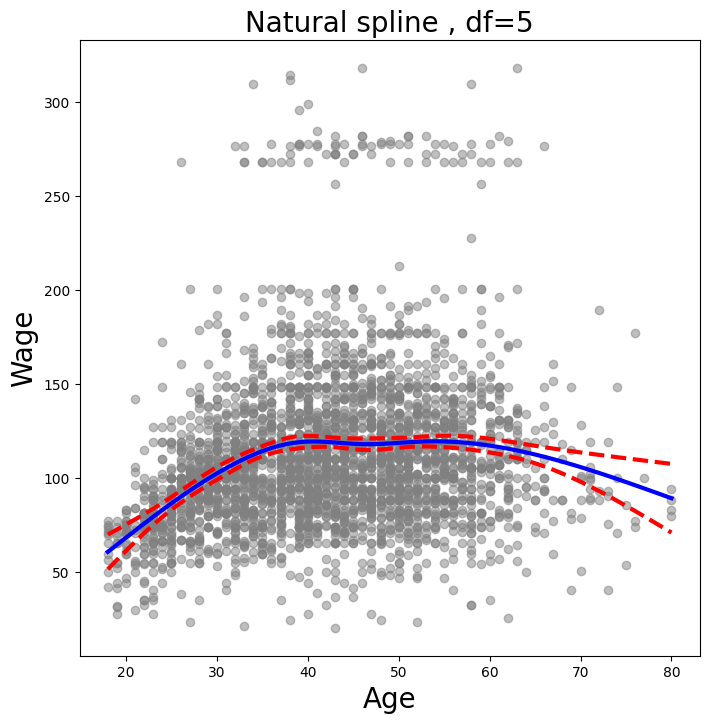

In [22]:
plot_wage_fit(age_df ,
              ns_age ,
              'Natural spline , df=5');

## Smoothing Splines and GAMs

A smoothing spline is a special case of a GAM with squared-error loss and a single feature. To fit GAMs in `Python` we will use the `pygam` package which can be installed via `pip install pygam`. The estimator `LinearGAM()` uses squared-error loss. The GAM is specified by associating each column of a model matrix with a particular smoothing operation: `s` for smoothing spline; `l` for linear, and `f` for factor or categorical variables. The argument `0` passed to s below indicates that this smoother will apply to the first column of a feature matrix. Below, we pass it a matrix with a single column: `X_age`. The argument lam is the penalty parameter $\lambda$ as discussed in theory section above

In [27]:
# X_age = np.asarray(age).reshape((-1,1))
# gam = LinearGAM(s_gam(0, lam=0.6))
# gam.fit(X_age , y)

Since the above code is not helpful, I am using Claude to generate the equivalent code

#### Option 1 - Using B-spline basis functions with LinearRegression

In [29]:
# Option 1: Using B-spline basis functions with LinearRegression
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [30]:
# Your original data preparation
X_age = np.asarray(age).reshape((-1, 1))

In [31]:
# Create a GAM-like model using splines
# SplineTransformer creates B-spline basis functions
spline_gam = Pipeline([
    ('spline', SplineTransformer(n_knots=10, degree=3, include_bias=False)),
    ('linear', LinearRegression())
])

# Fit the model
spline_gam.fit(X_age, y)

Pipeline(steps=[('spline', SplineTransformer(include_bias=False, n_knots=10)),
                ('linear', LinearRegression())])

In [32]:
# Make predictions
y_pred = spline_gam.predict(X_age)

print("Model fitted successfully!")
print(f"R² score: {spline_gam.score(X_age, y):.4f}")

Model fitted successfully!
R² score: 0.0892


#### Option 2 - Using Ridge regression for regularization (similar to lambda in GAM)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
# GAM with regularization
ridge_gam = Pipeline([
    ('spline', SplineTransformer(n_knots=10, degree=3, include_bias=False)),
    ('ridge', Ridge(alpha=0.6))  # alpha corresponds roughly to lambda in GAM
])

ridge_gam.fit(X_age, y)
y_pred_ridge = ridge_gam.predict(X_age)

print(f"Ridge GAM R² score: {ridge_gam.score(X_age, y):.4f}")

Ridge GAM R² score: 0.0891


#### Option 3 - More manual control over spline parameters

In [35]:
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge

In [36]:
# Create spline transformer with specific parameters
spline_transformer = SplineTransformer(
    n_knots=8,           # Number of knots (adjust based on your data)
    degree=3,            # Cubic splines (degree 3)
    knots='uniform',     # Uniform knot placement
    include_bias=False,  # Don't include bias term in splines
    extrapolation='constant'  # How to handle values outside range
)


In [37]:
# Transform the data
X_spline = spline_transformer.fit_transform(X_age)

In [38]:
# Fit ridge regression on spline features
ridge_model = Ridge(alpha=0.6)  # Regularization strength
ridge_model.fit(X_spline, y)

Ridge(alpha=0.6)

In [39]:
# Make predictions
y_pred_manual = ridge_model.predict(X_spline)

print(f"Manual spline GAM R² score: {ridge_model.score(X_spline, y):.4f}")

Manual spline GAM R² score: 0.0887


#### Option 4 - For plotting smooth curves

In [40]:
import matplotlib.pyplot as plt

In [41]:
# Create a smooth range for plotting
age_range = np.linspace(X_age.min(), X_age.max(), 300).reshape(-1, 1)

In [42]:
# Get smooth predictions
y_smooth = spline_gam.predict(age_range)
y_smooth_ridge = ridge_gam.predict(age_range)

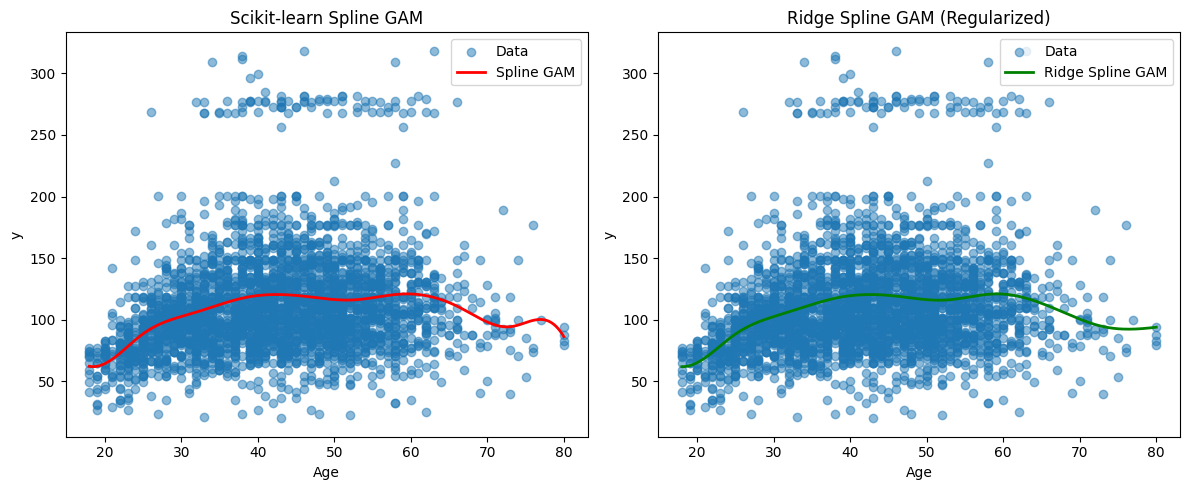

In [44]:
# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_age, y, alpha=0.5, label='Data')
plt.plot(age_range, y_smooth, 'r-', label='Spline GAM', linewidth=2)
plt.xlabel('Age')
plt.ylabel('y')
plt.title('Scikit-learn Spline GAM')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_age, y, alpha=0.5, label='Data')
plt.plot(age_range, y_smooth_ridge, 'g-', label='Ridge Spline GAM', linewidth=2)
plt.xlabel('Age')
plt.ylabel('y')
plt.title('Ridge Spline GAM (Regularized)')
plt.legend()

plt.tight_layout()
plt.show()

#### Option 5 - Cross-validation to choose optimal parameters

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Parameter grid for optimization
param_grid = {
    'spline__n_knots': [5, 8, 10, 15],
    'spline__degree': [2, 3],
    'ridge__alpha': [0.1, 0.6, 1.0, 2.0]
}

In [47]:
# Grid search with cross-validation
cv_gam = GridSearchCV(
    Pipeline([
        ('spline', SplineTransformer(include_bias=False)),
        ('ridge', Ridge())
    ]),
    param_grid,
    cv=5,
    scoring='r2'
)

cv_gam.fit(X_age, y)

print("Best parameters:", cv_gam.best_params_)
print(f"Best CV score: {cv_gam.best_score_:.4f}")

Best parameters: {'ridge__alpha': 0.6, 'spline__degree': 3, 'spline__n_knots': 5}
Best CV score: 0.0835


In [48]:
# Use the best model
best_gam = cv_gam.best_estimator_
y_pred_best = best_gam.predict(X_age)

Continuing from the book

The `pygam` library generally expects a matrix of features so we reshape `age` to be a matrix (a two-dimensional array) instead of a vector (i.e. a onedimensional array). The `-1` in the call to the `reshape()` method tells `numpy` to impute the size of that dimension based on the remaining entries of the shape tuple.<br> Let’s investigate how the fit changes with the smoothing parameter `lam`. The function `np.logspace()` is similar to `np.linspace()` but spaces points evenly on the log-scale. Below we vary lam from $10^{-2}$ to $10^6$

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

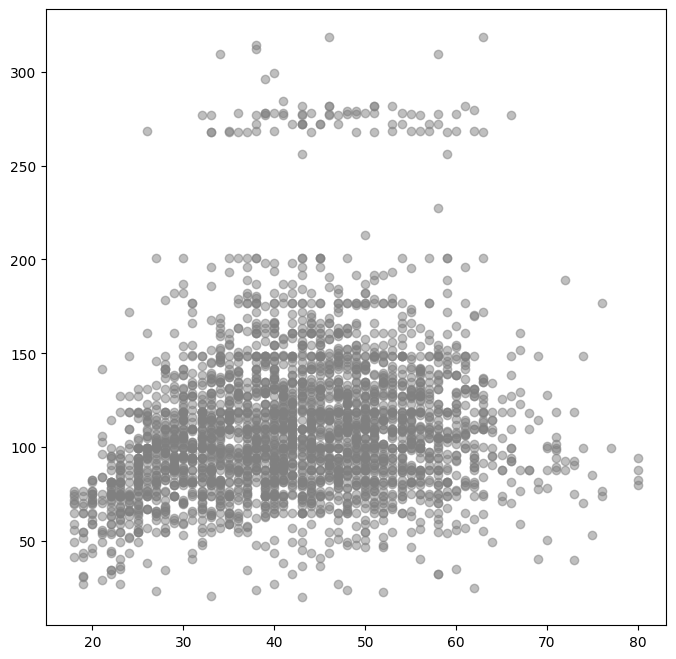

In [49]:
fig , ax = subplots(figsize=(8,8))
ax.scatter(age , y, facecolor='gray', alpha=0.5)
for lam in np.logspace(-2, 6, 5):
    gam = LinearGAM(s_gam(0, lam=lam)).fit(X_age , y)
    ax.plot(age_grid ,
            gam.predict(age_grid),
            label='{:.1e}'.format(lam),
            linewidth=3
           )
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20);
ax.legend(title='$\lambda$');

Since the above code was not working! Copied equivalent code from Claude

#### Solution 1 - Downgrade NumPy (Quick Fix)
Run this in your terminal/command prompt:`pip install numpy<2.0`.
But this will disturb dependancies, so we are NOT going to use this !

#### Solution 2: Use scikit-learn's SplineTransformer (Recommended)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

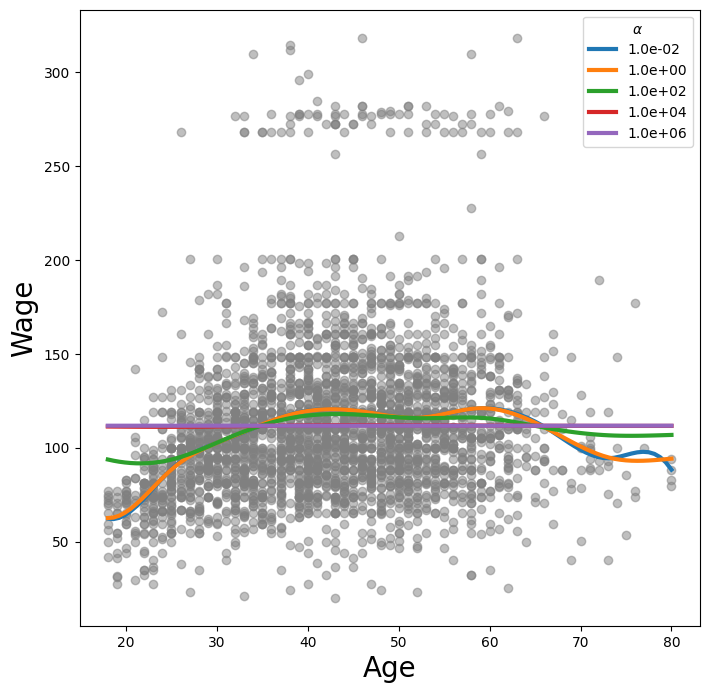

In [58]:
# Assuming you have your data: age, y, X_age, age_grid
# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(age, y, facecolor='gray', alpha=0.5)

# Use different regularization parameters (alphas for Ridge regression)
for alpha in np.logspace(-2, 6, 5):
    # Create a pipeline with spline transformation and ridge regression
    spline_model = Pipeline([
        ('spline', SplineTransformer(n_knots=10, degree=3)),
        ('ridge', Ridge(alpha=alpha))
    ])
    
    # Fit the model
    spline_model.fit(X_age, y)
    
    # Make predictions
    y_pred = spline_model.predict(age_grid.reshape(-1, 1))
    
    # Plot
    ax.plot(age_grid, y_pred, 
            label='{:.1e}'.format(alpha),
            linewidth=3)

ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20)
ax.legend(title='$\\alpha$')
plt.show()

#### Solution 3: Manual B-spline implementation

In [54]:
from scipy.interpolate import BSpline
from sklearn.linear_model import Ridge

In [56]:
def create_bspline_basis(x, knots, degree=3):
    """Create B-spline basis functions"""
    # Extend knots for proper boundary conditions
    extended_knots = np.concatenate([
        np.repeat(knots[0], degree),
        knots,
        np.repeat(knots[-1], degree)
    ])
    # Create basis matrix
    n_basis = len(knots) + degree - 1
    basis_matrix = np.zeros((len(x), n_basis))
    
    for i in range(n_basis):
        # Create a basis function with coefficient 1 at position i
        coeffs = np.zeros(n_basis)
        coeffs[i] = 1
        spline = BSpline(extended_knots, coeffs, degree)
        basis_matrix[:, i] = spline(x)
    
    return basis_matrix

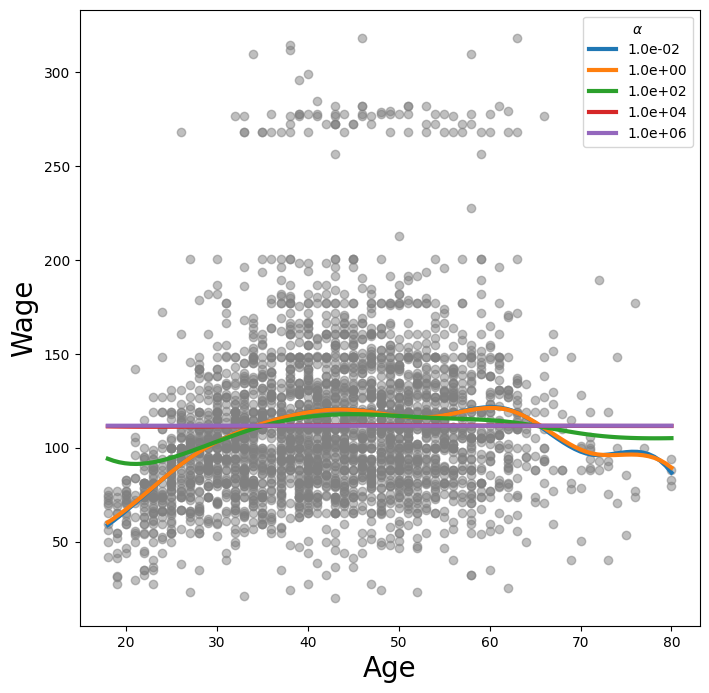

In [57]:
# Alternative manual implementation
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(age, y, facecolor='gray', alpha=0.5)

# Define knots (you may need to adjust based on your data range)
knots = np.linspace(age.min(), age.max(), 8)

for alpha in np.logspace(-2, 6, 5):
    # Create B-spline basis
    basis_train = create_bspline_basis(X_age.flatten(), knots)
    basis_test = create_bspline_basis(age_grid, knots)
    
    # Fit ridge regression on the basis
    ridge = Ridge(alpha=alpha)
    ridge.fit(basis_train, y)
    
    # Predict
    y_pred = ridge.predict(basis_test)
    
    # Plot
    ax.plot(age_grid, y_pred,
            label='{:.1e}'.format(alpha),
            linewidth=3)

ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20)
ax.legend(title='$\\alpha$')
plt.show()

#### Solution 4: Using statsmodels (if available)

In [64]:
try:
    import statsmodels.api as sm
    from statsmodels.gam.api import GLMGam, BSplines
    import pandas as pd
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(age, y, facecolor='gray', alpha=0.5)
    
    for alpha in np.logspace(-2, 6, 5):
        # Create B-spline smoother
        x_spline = BSplines(X_age.flatten(), df=10, degree=3)
        
        # Fit GAM directly (not using formula interface)
        gam = GLMGam(endog=y, smoother=x_spline, alpha=alpha)
        res = gam.fit()
        
        # Predict on grid
        x_spline_grid = BSplines(age_grid, df=10, degree=3)
        y_pred = res.predict(x_spline_grid)
        
        # Plot
        ax.plot(age_grid, y_pred,
                label='{:.1e}'.format(alpha),
                linewidth=3)
    
    ax.set_xlabel('Age', fontsize=20)
    ax.set_ylabel('Wage', fontsize=20)
    ax.legend(title=r'$\alpha$')
    plt.show()

SyntaxError: incomplete input (1580983195.py, line 29)

#### Solution 5 - Monkey patch fix (use with caution)
This temporarily fixes the np.int issue in pygam

In [69]:
import numpy as np
if not hasattr(np, 'int'):
    np.int = int
    np.float = float
    np.bool = bool

In [70]:
# Now your original code should work:
from pygam import LinearGAM, s as s_gam

In [71]:
X_age = np.asarray(age).reshape((-1,1))
gam = LinearGAM(s_gam(0, lam=0.6))
gam.fit(X_age , y)

AttributeError: 'csr_matrix' object has no attribute 'A'

AttributeError: 'csr_matrix' object has no attribute 'A'

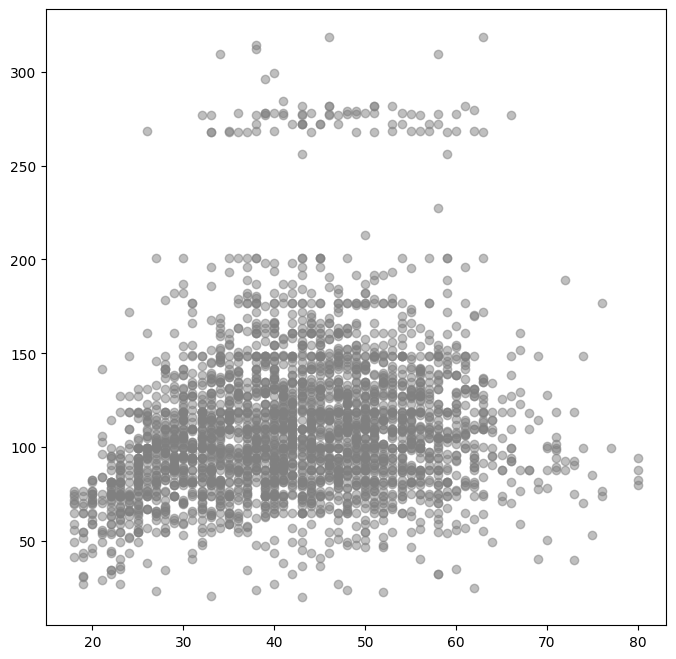

In [67]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(age, y, facecolor='gray', alpha=0.5)
for lam in np.logspace(-2, 6, 5):
    gam = LinearGAM(s_gam(0, lam=lam)).fit(X_age, y)
    ax.plot(age_grid,
            gam.predict(age_grid),
            label='{:.1e}'.format(lam),
            linewidth=3)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20)
ax.legend(title=r'$\lambda$')
plt.show()

We will stop using book's code, as there are more dependency and deprecated logics issues!! 